In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [11]:
df['tipo_depto'].unique()

array(['Departamento', 'Dúplex', nan, 'Tradicional', 'Semi piso',
       'Tríplex', '-', 'Penthhouse', 'Penthouse', 'Penhouse',
       'Cocina Tradicional', 'Monoambiente', 'Cocina Incorporada', 'Piso',
       'Un Ambiente', 'Loft', 'Penthouse Triplex', 'Completo', 'Clásico',
       'Normal', 'Estándar', 'Penthouse - Duplex', 'Moderno', 'Clasico',
       'Mariposa', 'Apto Oficina', 'Penthouse Duplex'], dtype=object)

In [12]:
df['tipo_depto'] = df['tipo_depto'].replace(['-', np.nan, 'Completo', 'Clásico', 'Normal', 'Estándar', 'Moderno', 'Clasico'], 'Departamento')

# Diccionario de reemplazo para consolidar tipos de departamento
reemplazos_tipo_depto = {
    'Penthhouse': 'Penthouse',
    'Penhouse': 'Penthouse',
    'Penthouse Triplex': 'Penthouse', # Consolidar en Penthouse
    'Penthouse - Duplex': 'Penthouse', # Consolidar en Penthouse
    'Penthouse Duplex': 'Penthouse',   # Consolidar en Penthouse
    'Semi piso': 'Semipiso',           # Unificar ortografía
    'Un Ambiente': 'Monoambiente',     # 'Un Ambiente' es lo mismo que 'Monoambiente'
    'Apto Oficina': 'Departamento',     # Si es apto oficina, sigue siendo un tipo de departamento en su base
    'Cocina Tradicional': 'Departamento', # Esto describe una característica, no un tipo fundamental
    'Cocina Incorporada': 'Departamento', # Esto describe una característica, no un tipo fundamental
    'Tradicional': 'Departamento', # No es un tipo distintivo, es un departamento estándar
    'Piso': 'Piso Completo' # Diferenciar de un Semipiso
}

# Aplicar los reemplazos
df['tipo_depto_norm'] = df['tipo_depto'].replace(reemplazos_tipo_depto)

In [13]:
mapeo_agrupacion = {
    'Mariposa': 'Departamento',             # Agrupar Mariposa directamente en Departamento
    'Dúplex': 'Multinivel',
    'Tríplex': 'Multinivel',
    'Piso Completo': 'Premium',
    'Penthouse': 'Premium'
    # 'Departamento', 'Semipiso', 'Monoambiente', 'Loft' se mantienen como están
}

# --- Paso 2: Aplicar las agrupaciones a la columna 'tipo_depto_norm' ---
# Reemplazamos los valores según el diccionario de mapeo
df['tipo_depto_norm'] = df['tipo_depto_norm'].replace(mapeo_agrupacion)

In [14]:
df['tipo_depto_norm'].unique()

array(['Departamento', 'Multinivel', 'Semipiso', 'Premium',
       'Monoambiente', 'Loft'], dtype=object)

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_30596\4190528604.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_tipos.index, y=frecuencia_tipos.values, palette='viridis')


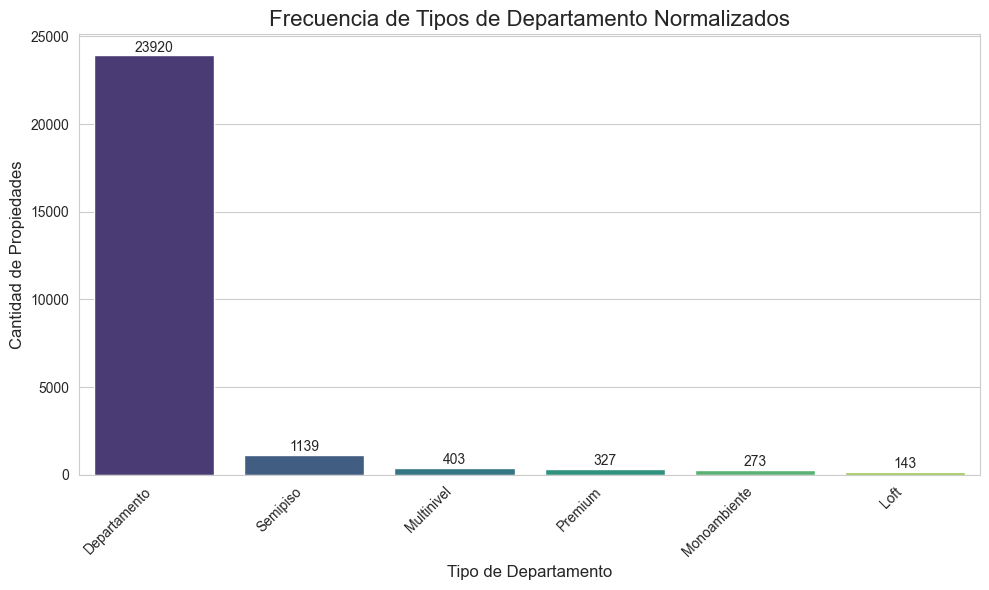

In [15]:
frecuencia_tipos = df['tipo_depto_norm'].value_counts()

# Opcional: Convertir a DataFrame para facilitar la visualización con Seaborn si prefieres
frecuencia_df = frecuencia_tipos.reset_index()
frecuencia_df.columns = ['Tipo de Departamento', 'Cantidad']

# Configurar el estilo de los gráficos para mejor apariencia
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) # Ajusta el tamaño para que sea legible

# Crear el gráfico de barras
sns.barplot(x=frecuencia_tipos.index, y=frecuencia_tipos.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Tipos de Departamento Normalizados', fontsize=16)
plt.xlabel('Tipo de Departamento', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)

# Rotar las etiquetas del eje X si son muy largas y se superponen
plt.xticks(rotation=45, ha='right') # 'ha'='right' alinea el final de la etiqueta con el tick

# Añadir los valores exactos encima de cada barra para mayor claridad
for index, value in enumerate(frecuencia_tipos.values):
    plt.text(index, value + 50, str(value), ha='center', va='bottom', fontsize=10) # Ajusta +50 si las barras son muy pequeñas

plt.tight_layout() # Ajusta automáticamente los parámetros del plot para un layout ajustado
plt.show()

In [16]:
final_categories = df['tipo_depto_norm'].unique()

for tipo in final_categories:
    # Asegúrate de que no haya NaNs persistentes que se conviertan en nombres de columna
    if pd.notna(tipo):
        # Limpiar los nombres de las columnas para evitar espacios o caracteres especiales
        clean_tipo_name = tipo.replace(" ", "_").replace("/", "_").replace(".", "")
        df[f'flag_{clean_tipo_name}'] = (df['tipo_depto_norm'] == tipo).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26205 non-null  int64  
 1   monto              26205 non-null  int64  
 2   ppm2               26200 non-null  float64
 3   superficie_t       26205 non-null  float64
 4   superficie_u       25974 non-null  float64
 5   terraza            26205 non-null  float64
 6   dormitorios        25504 non-null  float64
 7   banos              23893 non-null  float64
 8   estacionamiento    26205 non-null  int64  
 9   bodegas            26205 non-null  int64  
 10  cantidad_pisos     16156 non-null  float64
 11  piso               16110 non-null  float64
 12  tipo_depto         26205 non-null  object 
 13  antiguedad         20495 non-null  float64
 14  latitud            26205 non-null  float64
 15  longitud           26205 non-null  float64
 16  comuna             262

In [18]:
df.to_csv('Datasets\deptos_en_limpieza.csv', index=False)